# **SKOPJE AIR QUALITY PREDICTION**

Skopje is a capital city of Macedonia and one of the most polluted cities in Europe in the recent years. This kind of air pollution has been linked to increases in respiratory, cardiovascular and cancer diseases in my country. 

In this machine learning project, I use two publically available datasets to predict the air quality in Skopje. I look at the correlation between weather conditions(**temperature, humidity, wind speed and cloud cover**) and the particles(**PM10, PM2.5, O3, NO2, CO, SO2**).

Predicting the best model and after that building a web app using streamlit.

Datasets:

* [Hourly particle concentrations Skopje](https://air.moepp.gov.mk/?page_id=175)
* [Weather data](https://www.visualcrossing.com/weather/weather-data-services)



---





## **Data preprocessing**

Loading the dataset.
Checking if there are nulls.
12 columns:
1. time (hourly information from 01-01-2022 till 01-02-2022)
2. temp (temperature measured in degrees celsius)
3. humidity (humidity measured in g/m3)
4. windspeed (wind speed measured in km/h)
5. cloudcover (cloud cover measured in oktans)
6. conditions (weather conditions)
7. PM10 (PM10 particles measured in micro grams/cubic meter)
8. PM2.5 (PM2.5 particles measured in micro grams/cubic meter)
9. O3 (O3 particles measured in g/Nm3)
10. NO2 (NO2 particles measured in molec./cm2)
11. CO (CO particles measured in ppm)
12. SO2 (SO2 particles measured in ppm)

In [57]:
import pandas as pd

data = pd.read_csv("/content/measurements_Skopje.csv")

data.head(10)

,time,temp,humidity,windspeed,cloudcover,conditions,PM10,PM2.5,O3,NO2,CO,SO2
0,01-01-22 15:00,14.0,62.26,1.3,31.1,Partially cloudy,80.049,76.059,5.8,67.805,0.9025,5.3998
1,01-01-22 16:00,13.7,62.49,4.6,58.0,Partially cloudy,116.690,99.290,12.0,43.930,0.2656,6.4372
2,01-01-22 17:00,13.0,62.58,4.5,52.1,Partially cloudy,46.537,23.964,7.2,64.940,0.4222,7.9800
3,01-01-22 18:00,12.8,58.91,3.8,29.0,Partially cloudy,55.914,32.643,6.0,70.097,0.4431,3.6442
4,01-01-22 19:00,13.0,56.50,3.7,52.4,Partially cloudy,48.060,26.204,6.8,61.311,0.3318,5.0274
5,01-01-22 20:00,10.9,71.26,9.4,89.1,Partially cloudy,42.050,27.941,8.6,52.907,0.1624,3.1388
6,01-01-22 21:00,11.0,71.27,7.4,89.1,Partially cloudy,28.109,21.206,16.6,35.908,0.0139,2.1546
7,01-01-22 22:00,12.7,58.23,10.6,7.4,Clear,15.156,15.193,12.4,36.290,0.0394,2.6334
8,01-01-22 23:00,8.9,81.47,0.3,89.1,Partially cloudy,21.941,14.030,13.2,45.840,0.1589,2.8728
9,02-01-22 0:00,9.9,76.46,5.1,89.1,Partially cloudy,29.935,16.891,8.8,60.356,0.4466,3.1654


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   time        841 non-null    object 
 1   temp        841 non-null    float64
 2   humidity    841 non-null    float64
 3   windspeed   841 non-null    float64
 4   cloudcover  841 non-null    float64
 5   conditions  841 non-null    object 
 6   PM10        841 non-null    float64
 7   PM2.5       841 non-null    float64
 8   O3          841 non-null    float64
 9   NO2         841 non-null    float64
 10  CO          841 non-null    float64
 11  SO2         841 non-null    float64
dtypes: float64(10), object(2)
memory usage: 79.0+ KB


In [59]:
data.isnull().sum()

time          0
temp          0
humidity      0
windspeed     0
cloudcover    0
conditions    0
PM10          0
PM2.5         0
O3            0
NO2           0
CO            0
SO2           0
dtype: int64

## **Data visualization**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


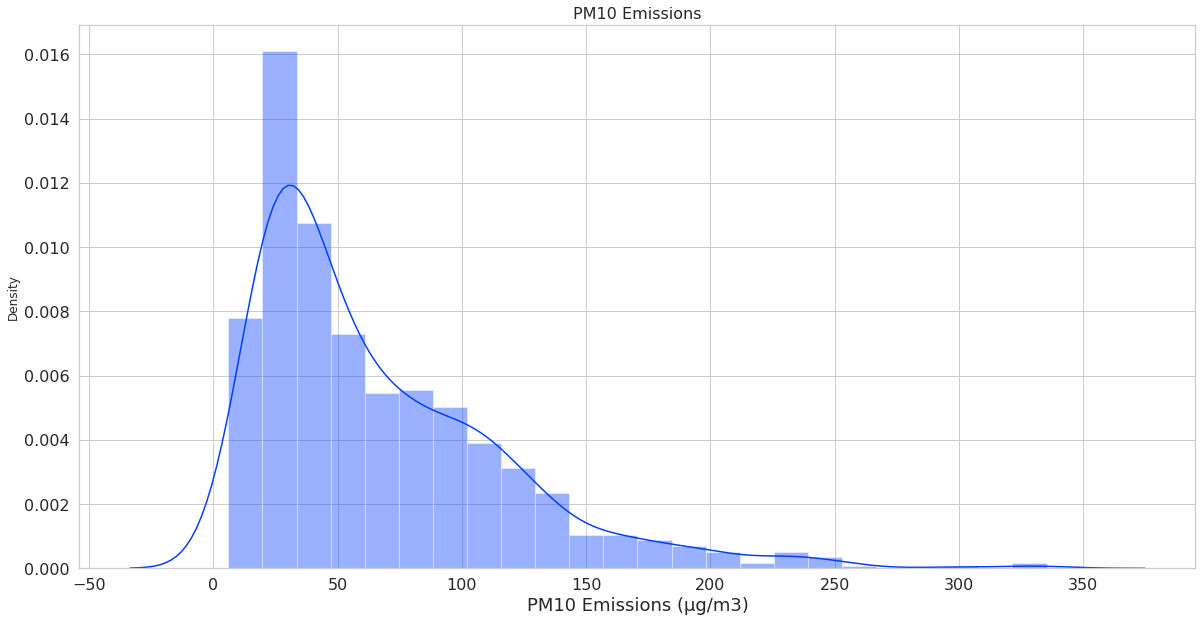

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(20, 10))
sns.distplot(data['PM10'], ax = ax)
ax.set_xlabel('PM10 Emissions (µg/m3)', fontsize = 18)
ax.set_title('PM10 Emissions', fontsize = 16)
ax.tick_params(labelsize=16)

PM10 particles in correlation with the weather conditions.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 0, ' ')

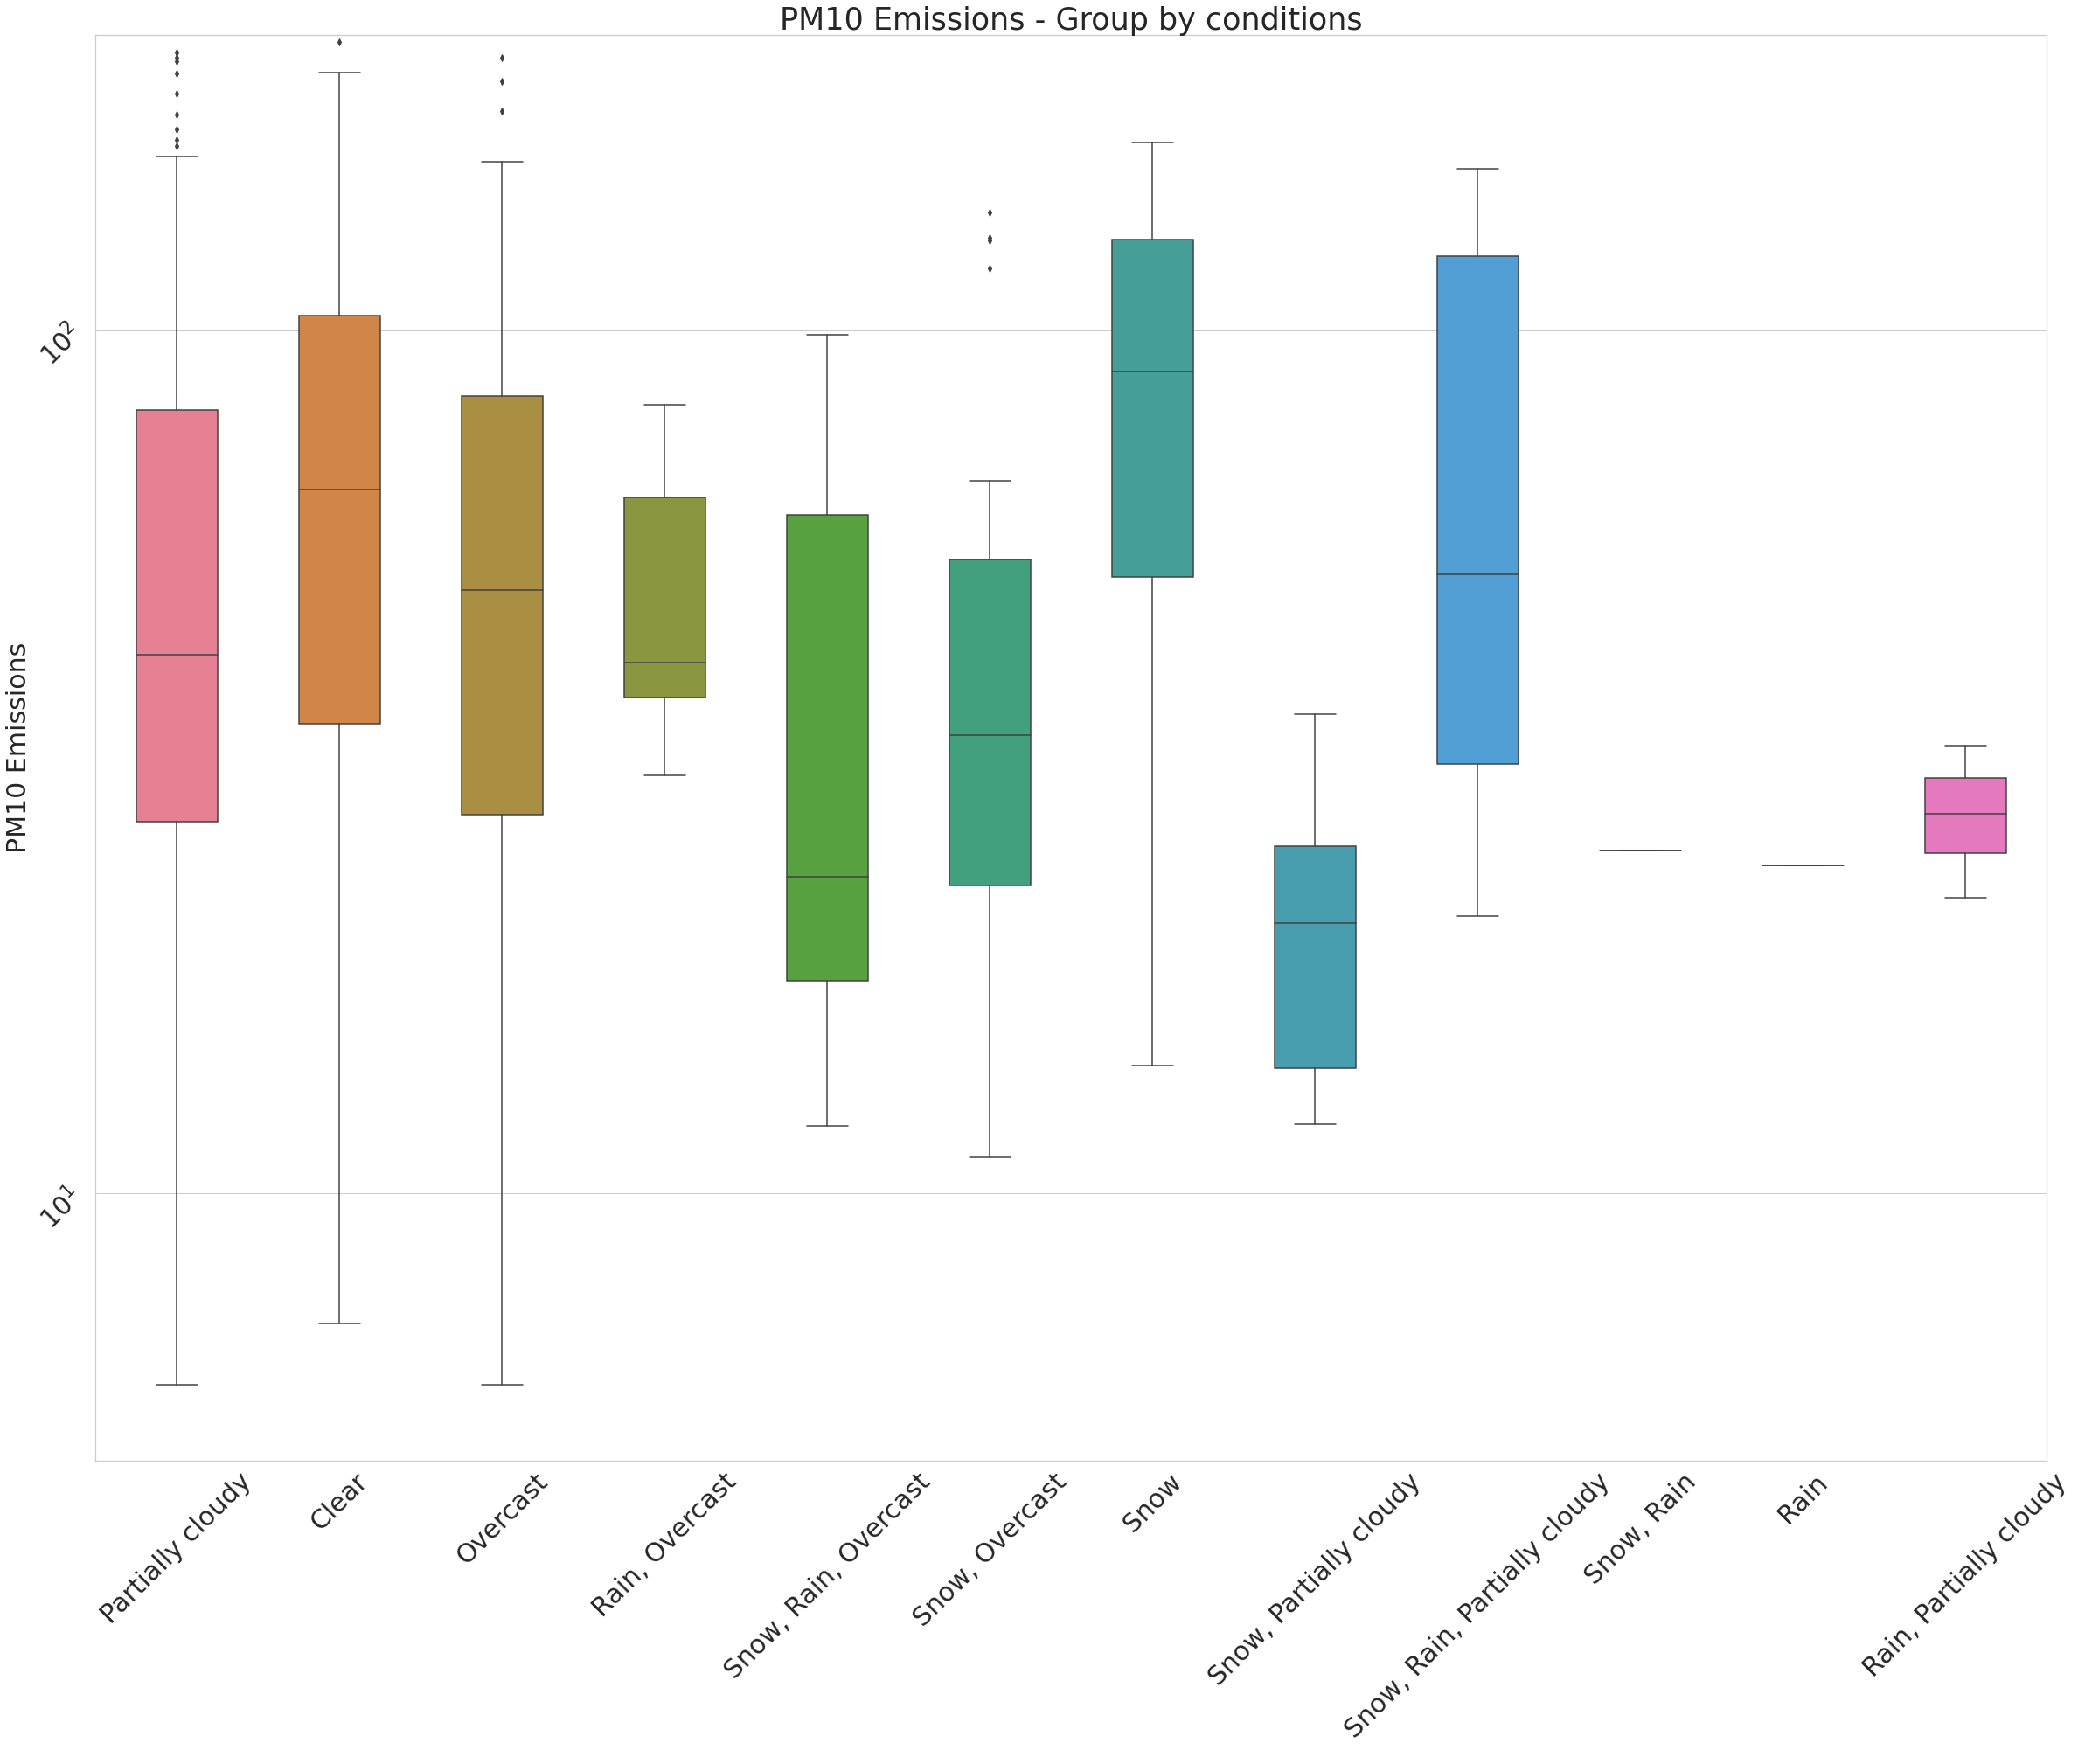

In [61]:
sns.set(style = 'whitegrid')
sns.set_palette('bright')
fig, ax = plt.subplots(figsize=(40, 30))
sns.boxplot(x="conditions", hue="conditions", y="PM10", palette="husl" ,data=data, width = 0.5, dodge = False)

ax.set_title('PM10 Emissions - Group by conditions', fontsize = 35)
ax.tick_params(labelsize=30, rotation = 45)
ax.legend_.remove()
ax.set_yscale('log')
ax.set_ylim(0,220)
ax.set_ylabel('PM10 Emissions', fontsize = 30)
ax.set_xlabel(' ')

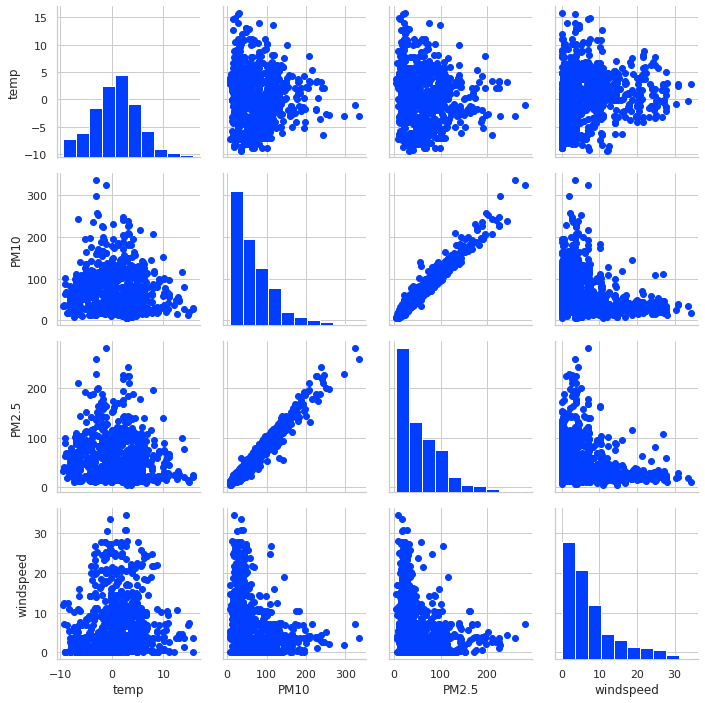

In [62]:
g = sns.PairGrid(data, vars=["temp", "PM10", "PM2.5", "windspeed"], dropna=True)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);


Feature heatmap

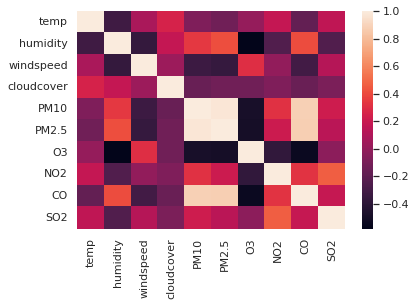

In [63]:
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

## **Data transformation**

In [75]:
data['time'] =  pd.to_datetime(data['time'], format='%d-%m-%y %H:%M')

data.head(10)

,time,temp,humidity,windspeed,cloudcover,conditions,PM10,PM2.5,O3,NO2,CO,SO2
0,2022-01-01 15:00:00,14.0,62.26,1.3,31.1,Partially cloudy,80.049,76.059,5.8,67.805,0.9025,5.3998
1,2022-01-01 16:00:00,13.7,62.49,4.6,58.0,Partially cloudy,116.690,99.290,12.0,43.930,0.2656,6.4372
2,2022-01-01 17:00:00,13.0,62.58,4.5,52.1,Partially cloudy,46.537,23.964,7.2,64.940,0.4222,7.9800
3,2022-01-01 18:00:00,12.8,58.91,3.8,29.0,Partially cloudy,55.914,32.643,6.0,70.097,0.4431,3.6442
4,2022-01-01 19:00:00,13.0,56.50,3.7,52.4,Partially cloudy,48.060,26.204,6.8,61.311,0.3318,5.0274
5,2022-01-01 20:00:00,10.9,71.26,9.4,89.1,Partially cloudy,42.050,27.941,8.6,52.907,0.1624,3.1388
6,2022-01-01 21:00:00,11.0,71.27,7.4,89.1,Partially cloudy,28.109,21.206,16.6,35.908,0.0139,2.1546
7,2022-01-01 22:00:00,12.7,58.23,10.6,7.4,Clear,15.156,15.193,12.4,36.290,0.0394,2.6334
8,2022-01-01 23:00:00,8.9,81.47,0.3,89.1,Partially cloudy,21.941,14.030,13.2,45.840,0.1589,2.8728
9,2022-01-02 00:00:00,9.9,76.46,5.1,89.1,Partially cloudy,29.935,16.891,8.8,60.356,0.4466,3.1654


In [82]:
data.set_index('time')
data['time'] = pd.to_numeric(pd.to_datetime(data['time']))

## **Prediction using machine-learning algorithms**

First prediction for PM10 particles:

In [83]:
from sklearn.model_selection import train_test_split

y = data['PM10']
X = data.drop(['conditions','PM10'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lr = LinearRegression()

lr.fit(X_train, y_train)

lin_pred = lr.predict(X_test)
linear_regression_score = lr.score(X_test, y_test)
print("Linear regression score for PM10: ", linear_regression_score)
print("Mean absolute error for PM10: %.2f"
      % mean_absolute_error(y_test, lin_pred))

Linear regression score for PM10:  0.9610762588760843
Mean absolute error for PM10: 6.39


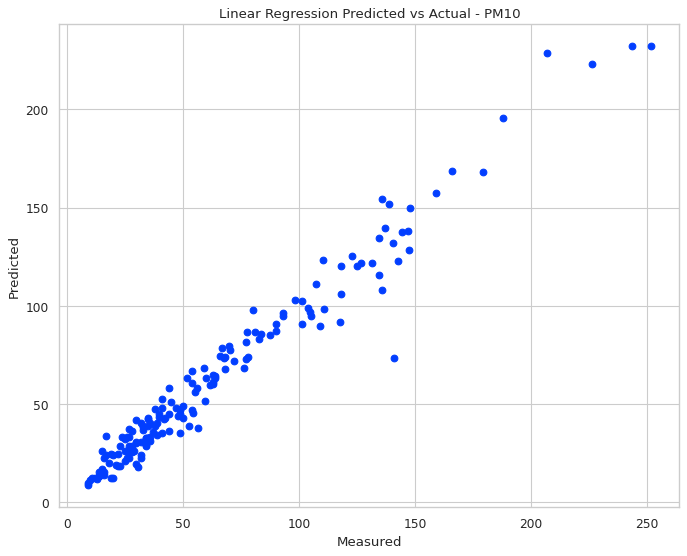

In [85]:
from matplotlib.pyplot import figure

figure(figsize=(10, 8), dpi=80)
plt.scatter(y_test, lin_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Linear Regression Predicted vs Actual - PM10')
plt.show()

In [86]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


regr_rf = RandomForestRegressor(n_estimators=200, random_state=1234)

regr_rf.fit(X_train, y_train)

decision_forest_score = regr_rf.score(X_test, y_test)
print("Decision forest score for PM10: ", decision_forest_score)

regr_rf_pred = regr_rf.predict(X_test)
print("Mean absolute error for PM10: %.2f"
      % mean_absolute_error(y_test, regr_rf_pred))

Decision forest score for PM10:  0.9632519403862948
Mean absolute error for PM10: 6.34


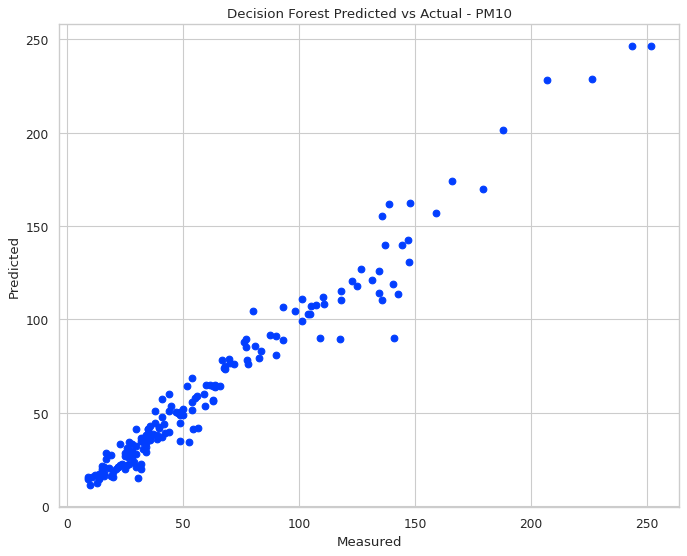

In [87]:
figure(figsize=(10, 8), dpi=80)
plt.scatter(y_test, regr_rf_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Decision Forest Predicted vs Actual - PM10')
plt.show()

Prediction for O3 particles:

In [88]:
from sklearn.model_selection import train_test_split

y1 = data['O3']
X1 = data.drop(['conditions','O3'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=1234)

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lr = LinearRegression()

lr.fit(X_train, y_train)

lin_pred = lr.predict(X_test)
linear_regression_score = lr.score(X_test, y_test)
print("Linear regression score for O3: ", linear_regression_score)
print("Mean absolute error for O3: %.2f"
      % mean_absolute_error(y_test, lin_pred))

Linear regression score for O3:  0.642908887514116
Mean absolute error for O3: 5.63


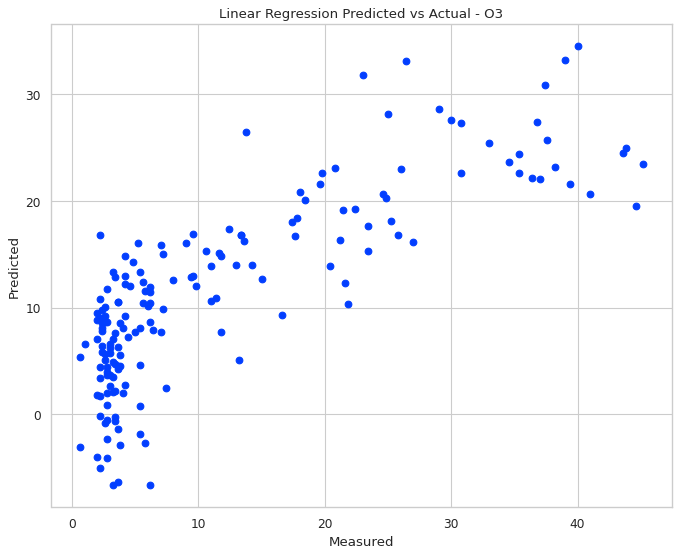

In [90]:
from matplotlib.pyplot import figure

figure(figsize=(10, 8), dpi=80)
plt.scatter(y_test, lin_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Linear Regression Predicted vs Actual - O3')
plt.show()

In [91]:
regr_rf = RandomForestRegressor(n_estimators=200, random_state=1234)

regr_rf.fit(X_train, y_train)

decision_forest_score = regr_rf.score(X_test, y_test)
print("Decision forest score for O3: ", decision_forest_score)

regr_rf_pred = regr_rf.predict(X_test)
print("Mean absolute error for O3: %.2f"
      % mean_absolute_error(y_test, regr_rf_pred))

Decision forest score for O3:  0.8725286087583348
Mean absolute error for O3: 2.75


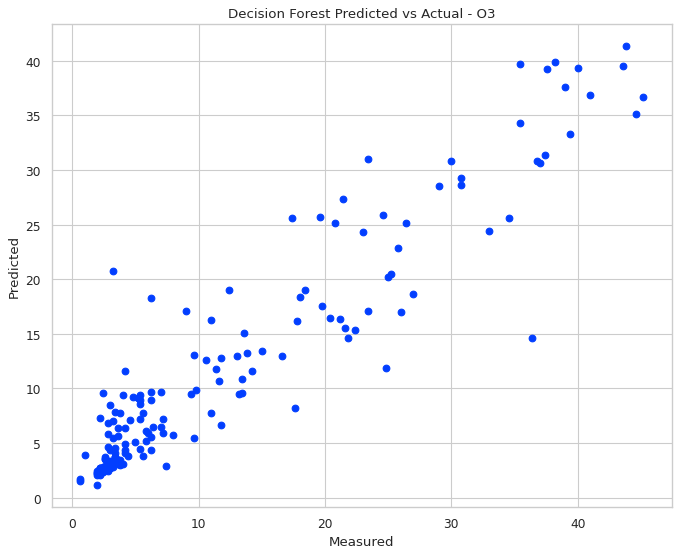

In [92]:
figure(figsize=(10, 8), dpi=80)
plt.scatter(y_test, regr_rf_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Decision Forest Predicted vs Actual - O3')
plt.show()

Prediction for NO2 particles:

In [93]:
y2 = data['NO2']
X2 = data.drop(['conditions','NO2'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=1234)

lr = LinearRegression()

lr.fit(X_train, y_train)

lin_pred = lr.predict(X_test)
linear_regression_score = lr.score(X_test, y_test)
print("Linear regression score for NO2: ", linear_regression_score)
print("Mean absolute error for NO2: %.2f"
      % mean_absolute_error(y_test, lin_pred))

Linear regression score for NO2:  0.5983969120986478
Mean absolute error for NO2: 9.84


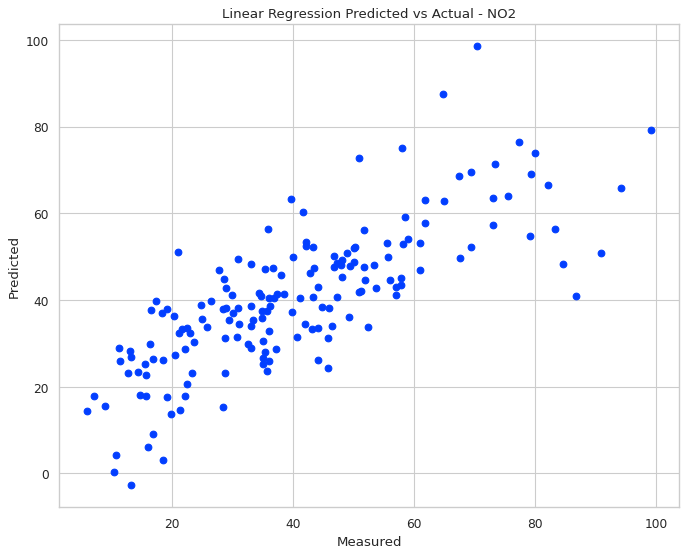

In [94]:
from matplotlib.pyplot import figure

figure(figsize=(10, 8), dpi=80)
plt.scatter(y_test, lin_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Linear Regression Predicted vs Actual - NO2')
plt.show()

In [95]:
regr_rf = RandomForestRegressor(n_estimators=200, random_state=1234)

regr_rf.fit(X_train, y_train)

decision_forest_score = regr_rf.score(X_test, y_test)
print("Decision forest score for NO2: ", decision_forest_score)

regr_rf_pred = regr_rf.predict(X_test)
print("Mean absolute error for NO2: %.2f"
      % mean_absolute_error(y_test, regr_rf_pred))

Decision forest score for NO2:  0.7246898103141433
Mean absolute error for NO2: 7.74


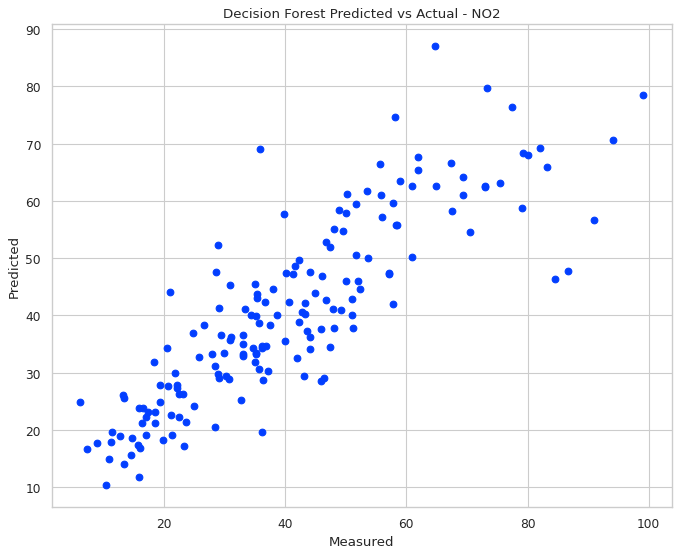

In [96]:
figure(figsize=(10, 8), dpi=80)
plt.scatter(y_test, regr_rf_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Decision Forest Predicted vs Actual - NO2')
plt.show()

Prediction for CO particles:

In [97]:
y3 = data['CO']
X3 = data.drop(['conditions','CO'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.2, random_state=1234)

lr = LinearRegression()

lr.fit(X_train, y_train)

lin_pred = lr.predict(X_test)
linear_regression_score = lr.score(X_test, y_test)
print("Linear regression score for CO: ", linear_regression_score)
print("Mean absolute error for CO: %.2f"
      % mean_absolute_error(y_test, lin_pred))

Linear regression score for CO:  0.8131402955665041
Mean absolute error for CO: 0.17


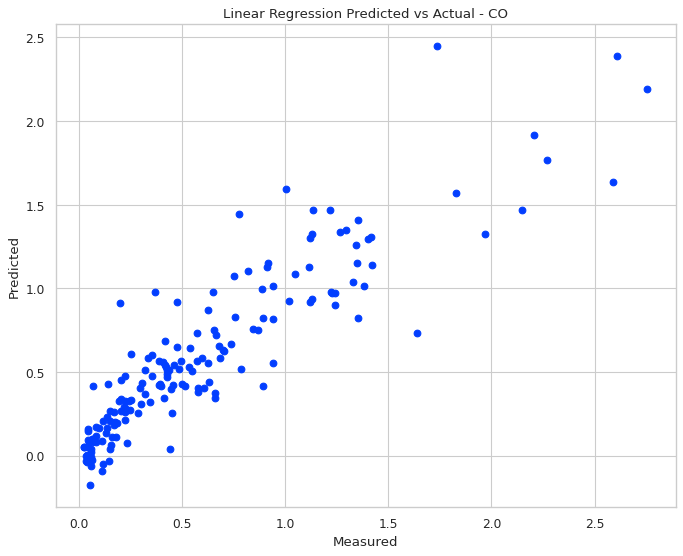

In [98]:
from matplotlib.pyplot import figure

figure(figsize=(10, 8), dpi=80)
plt.scatter(y_test, lin_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Linear Regression Predicted vs Actual - CO')
plt.show()

In [99]:
regr_rf = RandomForestRegressor(n_estimators=200, random_state=1234)

regr_rf.fit(X_train, y_train)

decision_forest_score = regr_rf.score(X_test, y_test)
print("Decision forest score for CO: ", decision_forest_score)

regr_rf_pred = regr_rf.predict(X_test)
print("Mean absolute error for CO: %.2f"
      % mean_absolute_error(y_test, regr_rf_pred))

Decision forest score for CO:  0.8110841092399959
Mean absolute error for CO: 0.14


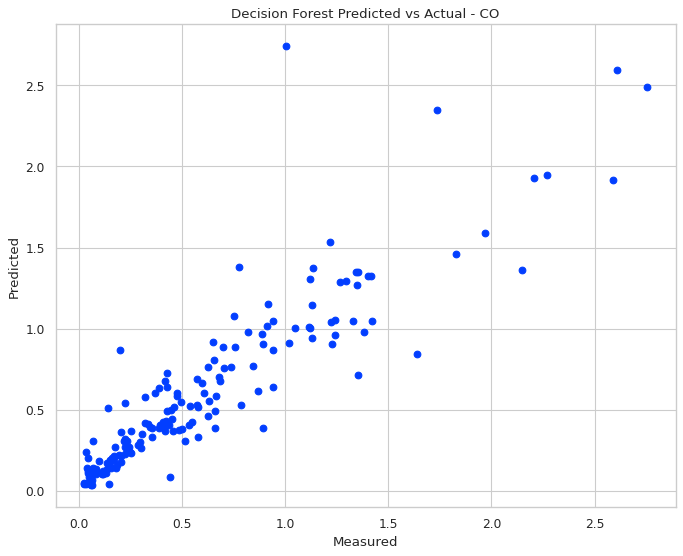

In [100]:
figure(figsize=(10, 8), dpi=80)
plt.scatter(y_test, regr_rf_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Decision Forest Predicted vs Actual - CO')
plt.show()

Prediction for SO2 particles:

In [101]:
y4 = data['SO2']
X4 = data.drop(['conditions','SO2'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X4, y4, test_size=0.2, random_state=1234)

lr = LinearRegression()

lr.fit(X_train, y_train)

lin_pred = lr.predict(X_test)
linear_regression_score = lr.score(X_test, y_test)
print("Linear regression score for SO2: ", linear_regression_score)
print("Mean absolute error for SO2: %.2f"
      % mean_absolute_error(y_test, lin_pred))

Linear regression score for SO2:  0.2750997946524554
Mean absolute error for SO2: 1.00


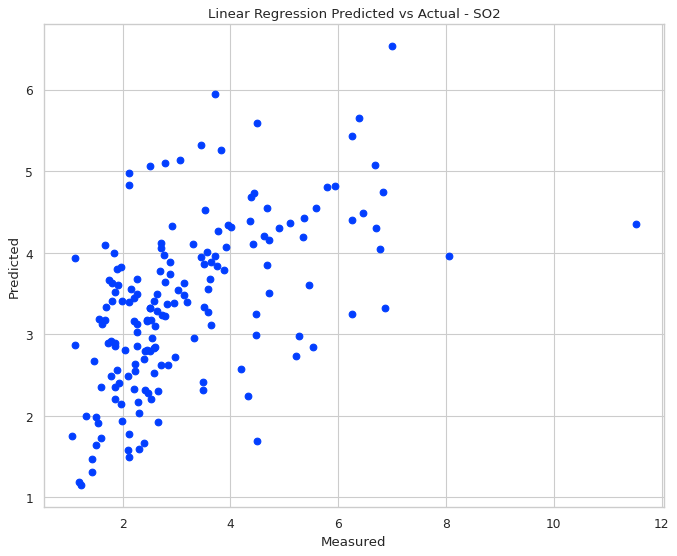

In [102]:
from matplotlib.pyplot import figure

figure(figsize=(10, 8), dpi=80)
plt.scatter(y_test, lin_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Linear Regression Predicted vs Actual - SO2')
plt.show()

In [103]:
regr_rf = RandomForestRegressor(n_estimators=200, random_state=1234)

regr_rf.fit(X_train, y_train)

decision_forest_score = regr_rf.score(X_test, y_test)
print("Decision forest score for SO2: ", decision_forest_score)

regr_rf_pred = regr_rf.predict(X_test)
print("Mean absolute error for SO2: %.2f"
      % mean_absolute_error(y_test, regr_rf_pred))

Decision forest score for SO2:  0.4164323623791828
Mean absolute error for SO2: 0.87


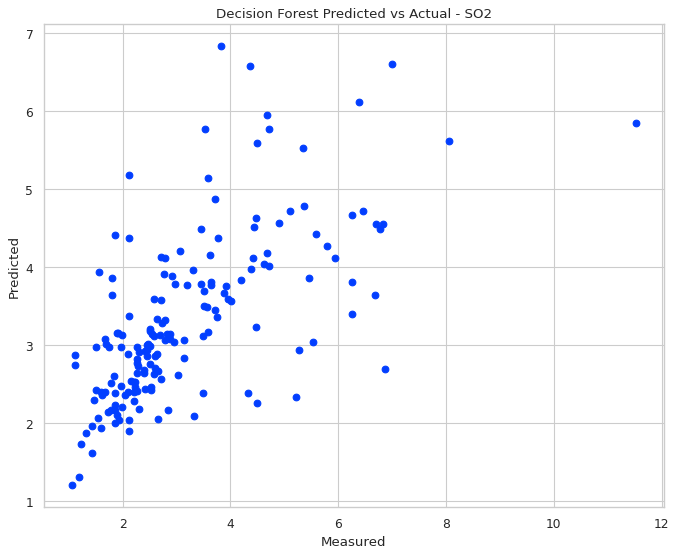

In [104]:
figure(figsize=(10, 8), dpi=80)
plt.scatter(y_test, regr_rf_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Decision Forest Predicted vs Actual - SO2')
plt.show()